iris.data.shape (150, 4)
df_iris:    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  
setosa        50
virginica     50
versicolor    50
Name: species, dtype: int64
mean [3.758      1.19933333]
   petal length (cm)  petal width (cm)
0             -2.358         -0.999333
1             -2.358         -0.999333
2             -2.458         -0.999333
3             -2.258         -0.999333
4             -2.358         -0.999333
Covariance matrix 
 [[3.11627785 1.2956094 ]
 [1.2956094  0.58100626]]
Eigenv

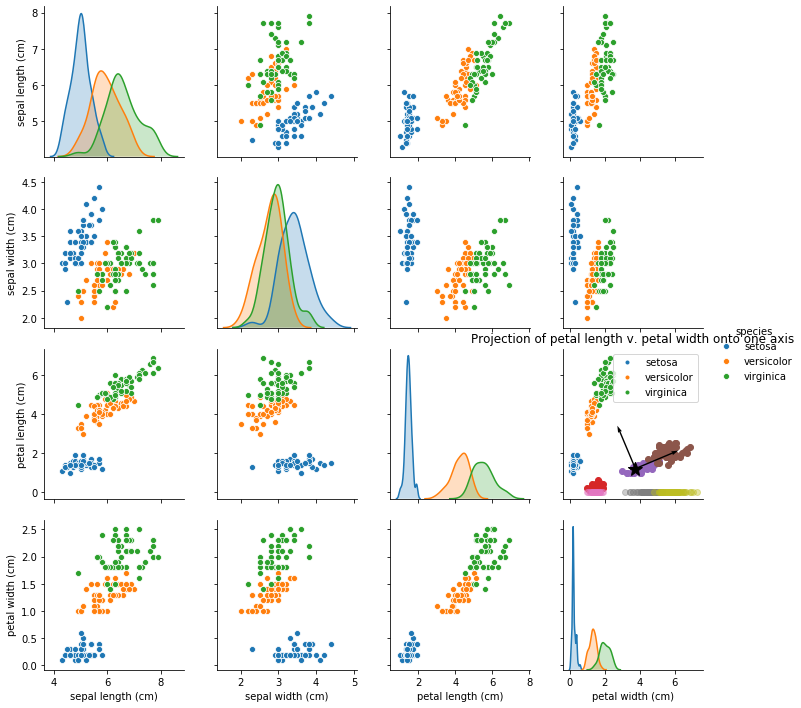

In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn import datasets 
import seaborn as sns 
# Import the Iris dataset and convert it into a Pandas DataFrame 
iris = datasets.load_iris()
# check the shape of the features (first dimension = number of observations, second dimensions = number of features) 
print ("iris.data.shape",iris.data.shape) 
# Make a DataFrame with a species column
df_iris = pd.DataFrame (iris.data, columns=iris.feature_names) 
df_iris['species'] = iris.target_names [iris.target] 
# Take a look at df_iris 
print ("df_iris:",df_iris.head()) 
#How many data points for each class are present? 
print (df_iris['species'].value_counts()) 
# plot pairwise comparison to explore the data 
sns.pairplot(df_iris, hue='species') 
# Compute the mean 
m = np.array([df_iris['petal length (cm)'] .mean(), df_iris['petal width (cm)'].mean () ])
print ("mean",m) 
plt.legend (loc=0)
plt.margins (0.02)
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
# plot petal length vs petal width only 
for key, group in df_iris.groupby (['species']): 
    plt.plot(group['petal length (cm)'], group['petal width (cm)'], label=key, marker='.', linestyle='none') 
# Add the mean value to the plot
plt.plot(m[0], m[1], marker='*', color='black', markersize=15, linestyle='none', label='mean') 
# Substract the mean from the measurements. 
df_centered = df_iris.loc[:, ['petal length (cm)', 'petal width (cm)']] 
for col in df_centered.columns: 
    df_centered[col] -= df_centered [col].mean() 
# Take a look 
print(df_centered.head())
# Compute the covariance matrix 
cov_mat = np.cov(df_centered.transpose()) 
print('Covariance matrix \n', cov_mat) 
# Compute the eigensystem 
eig_vals, eig_vecs = np.linalg.eig (cov_mat) 
print('Eigenvectors\n', eig_vecs)
print('\nEigenvalues\n', eig_vals) 
# plot Petal length vs petal width only 
for key, group in df_iris.groupby (['species']): 
    plt.plot(group['petal length (cm)'], group['petal width (cm)'], label=key, marker='o', linestyle='none') 
# Tidy up plot 
plt.legend (loc=0, fontsize=15)
plt.margins (0.02) 
plt.xlabel('petal length (cm)') 
plt.ylabel('petal width (cm)')
plt.title('Iris data with principal components'); 
# Add the mean value to the plot 
plt.plot(m[0], m[1], marker='*', color='black', markersize=15) 
# Add arrows showing the eigenvectors 
plt.quiver ([m[0]]*2, [m[1]]*2, eig_vecs[:,1], eig_vecs[:,0], zorder=11, width=0.01, scale=3) 
# Compute how much variance is explained by each principal component 
print("""
PCA 1: {0:.2f}% of the variance 
PCA 2: {1:.2f}% of the variance """.format(*tuple(eig_vals / np. sum(eig_vals) * 100))) 
# Project data to our 1D space 
df_1D = pd.DataFrame (np.dot(df_iris.loc[:,['petal length (cm)', 'petal width (cm)']], eig_vecs[:,0]), columns=['projection']) 

# Add back the species column 
df_1D ['species'] = df_iris['species'] 
print (df_1D.head() )
plt.margins (0.05) 
plt.xlabel('PCA 1')
plt.legend(np.array(['setosa', 'versicolor', 'virginica'])) 
plt.title('Projection of petal length v. petal width onto one axis') 
# plot our data in 10 only while maintaining 98% percent of the variability in the data! 
for key, group in df_1D.groupby(['species']): 
                   plt.plot(group['projection'], np.zeros_like (group['projection']), alpha=0.4, label=key, marker='o', linestyle='none')